Hi again 

I know What to do now 

first let's Extract data and Store it in dataframe with label and images path

In [1]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import os
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras


In [2]:

dir_path = "./ORAND-CAR-2014/"

CAR_A_test_images_path = dir_path + 'CAR-A/a_test_images/'
CAR_A_train_images_path = dir_path + 'CAR-A/a_train_images/'
CAR_B_test_images_path = dir_path + 'CAR-B/b_test_images/'
CAR_B_train_images_path = dir_path + 'CAR-B/b_train_images/'

image_paths = []
for root, dirs, files in os.walk(dir_path):
    for file in files:
        if file.endswith('.png'):
            image_path = os.path.join(root, file)
            image_paths.append(image_path.replace('\\','/'))

print('Number of images:', len(image_paths))
print(image_paths[0])

Number of images: 11719
./ORAND-CAR-2014/CAR-A/a_test_images/a_car_007000.png


In [3]:
CAR_A_test_text = dir_path + 'CAR-A/a_test_gt.txt'
CAR_A_train_text = dir_path + 'CAR-A/a_train_gt.txt'
CAR_B_test_text = dir_path + 'CAR-B/b_test_gt.txt'
CAR_B_train_text = dir_path + 'CAR-B/b_train_gt.txt'


def get_labels(image_dir,text_path):
  with open(text_path,'r') as f :
    lines = f.readlines()
  listt = []
  for line in lines :
    parts = line.strip().split("\t")
    listt.append([image_dir + parts[0],parts[1]])
  DF = pd.DataFrame(listt)
  DF = DF.rename(columns={0: 'image_path', 1: 'label'})
  return DF

a_test_label_df = get_labels(CAR_A_test_images_path,CAR_A_test_text)
a_train_label_df = get_labels(CAR_A_train_images_path,CAR_A_train_text)
b_test_label_df = get_labels(CAR_B_test_images_path,CAR_B_test_text)
b_train_label_df = get_labels(CAR_B_train_images_path,CAR_B_train_text)
all_labels = pd.concat([a_test_label_df , a_train_label_df , b_test_label_df , b_train_label_df],ignore_index=True)#.reset_index()
print(len(all_labels))
print(len(all_labels['image_path'].unique())) # no dupicate image name
all_labels.head()

11719
11719


,image_path,label
0,./ORAND-CAR-2014/CAR-A/a_test_images/a_car_007...,1500
1,./ORAND-CAR-2014/CAR-A/a_test_images/a_car_007...,5743
2,./ORAND-CAR-2014/CAR-A/a_test_images/a_car_007...,1056
3,./ORAND-CAR-2014/CAR-A/a_test_images/a_car_007...,1000
4,./ORAND-CAR-2014/CAR-A/a_test_images/a_car_007...,1000


In [4]:
height_list = []
width_list = []
for image_path in all_labels['image_path']:
  height = Image.open(image_path).height
  width = Image.open(image_path).width
  
  height_list.append(height)
  width_list.append(width)

sizes_df = pd.DataFrame({'width':width_list,'height':height_list})
sizes_df.describe()

,width,height
count,11719.000000,11719.000000
mean,172.944705,54.925250
std,44.082070,9.066699
min,40.000000,28.000000
25%,144.000000,49.000000
50%,171.000000,54.000000
75%,199.000000,61.000000
max,363.000000,108.000000


In [5]:
# fig = plt.figure(figsize=(18, 30))
# plt.scatter(np.arange(len(sizes)),s)
# plt.show()

In [6]:
#ok we save them into variables 
max_width = 363
max_height = 108

In [6]:
# store all images into one directory with renameing and updating dataframe
new_dir_path = './images/'
os.makedirs(new_dir_path)
def move_to_im_dir(df):
  for i,img in enumerate(df['image_path']):
    im = Image.open(img)
    im = im.resize((363,108))
    im.save(new_dir_path + "{:0>{}}.png".format(i, 5))

move_to_im_dir(all_labels)
all_labels["new_path"] = ["{}{:0>{}}.png".format(new_dir_path,i, 5) for i in range(len(all_labels))]
all_labels = all_labels.drop(columns=['image_path'])

all_labels

,label,new_path
0,1500,./images/00000.png
1,5743,./images/00001.png
2,1056,./images/00002.png
3,1000,./images/00003.png
4,1000,./images/00004.png
...,...,...
11714,100000,./images/11714.png
11715,85000,./images/11715.png
11716,150000,./images/11716.png
11717,13356,./images/11717.png


In [7]:
all_labels['label'] = all_labels['label'].astype(int)
labels = np.array(all_labels['label'])
print("max is ",np.max(labels))
print("min is ",np.min(labels))
all_labels['label'].describe()

max is  67491288
min is  15


count    1.171900e+04
mean     2.266600e+05
std      1.225184e+06
min      1.500000e+01
25%      1.000000e+04
50%      4.000000e+04
75%      1.568830e+05
max      6.749129e+07
Name: label, dtype: float64

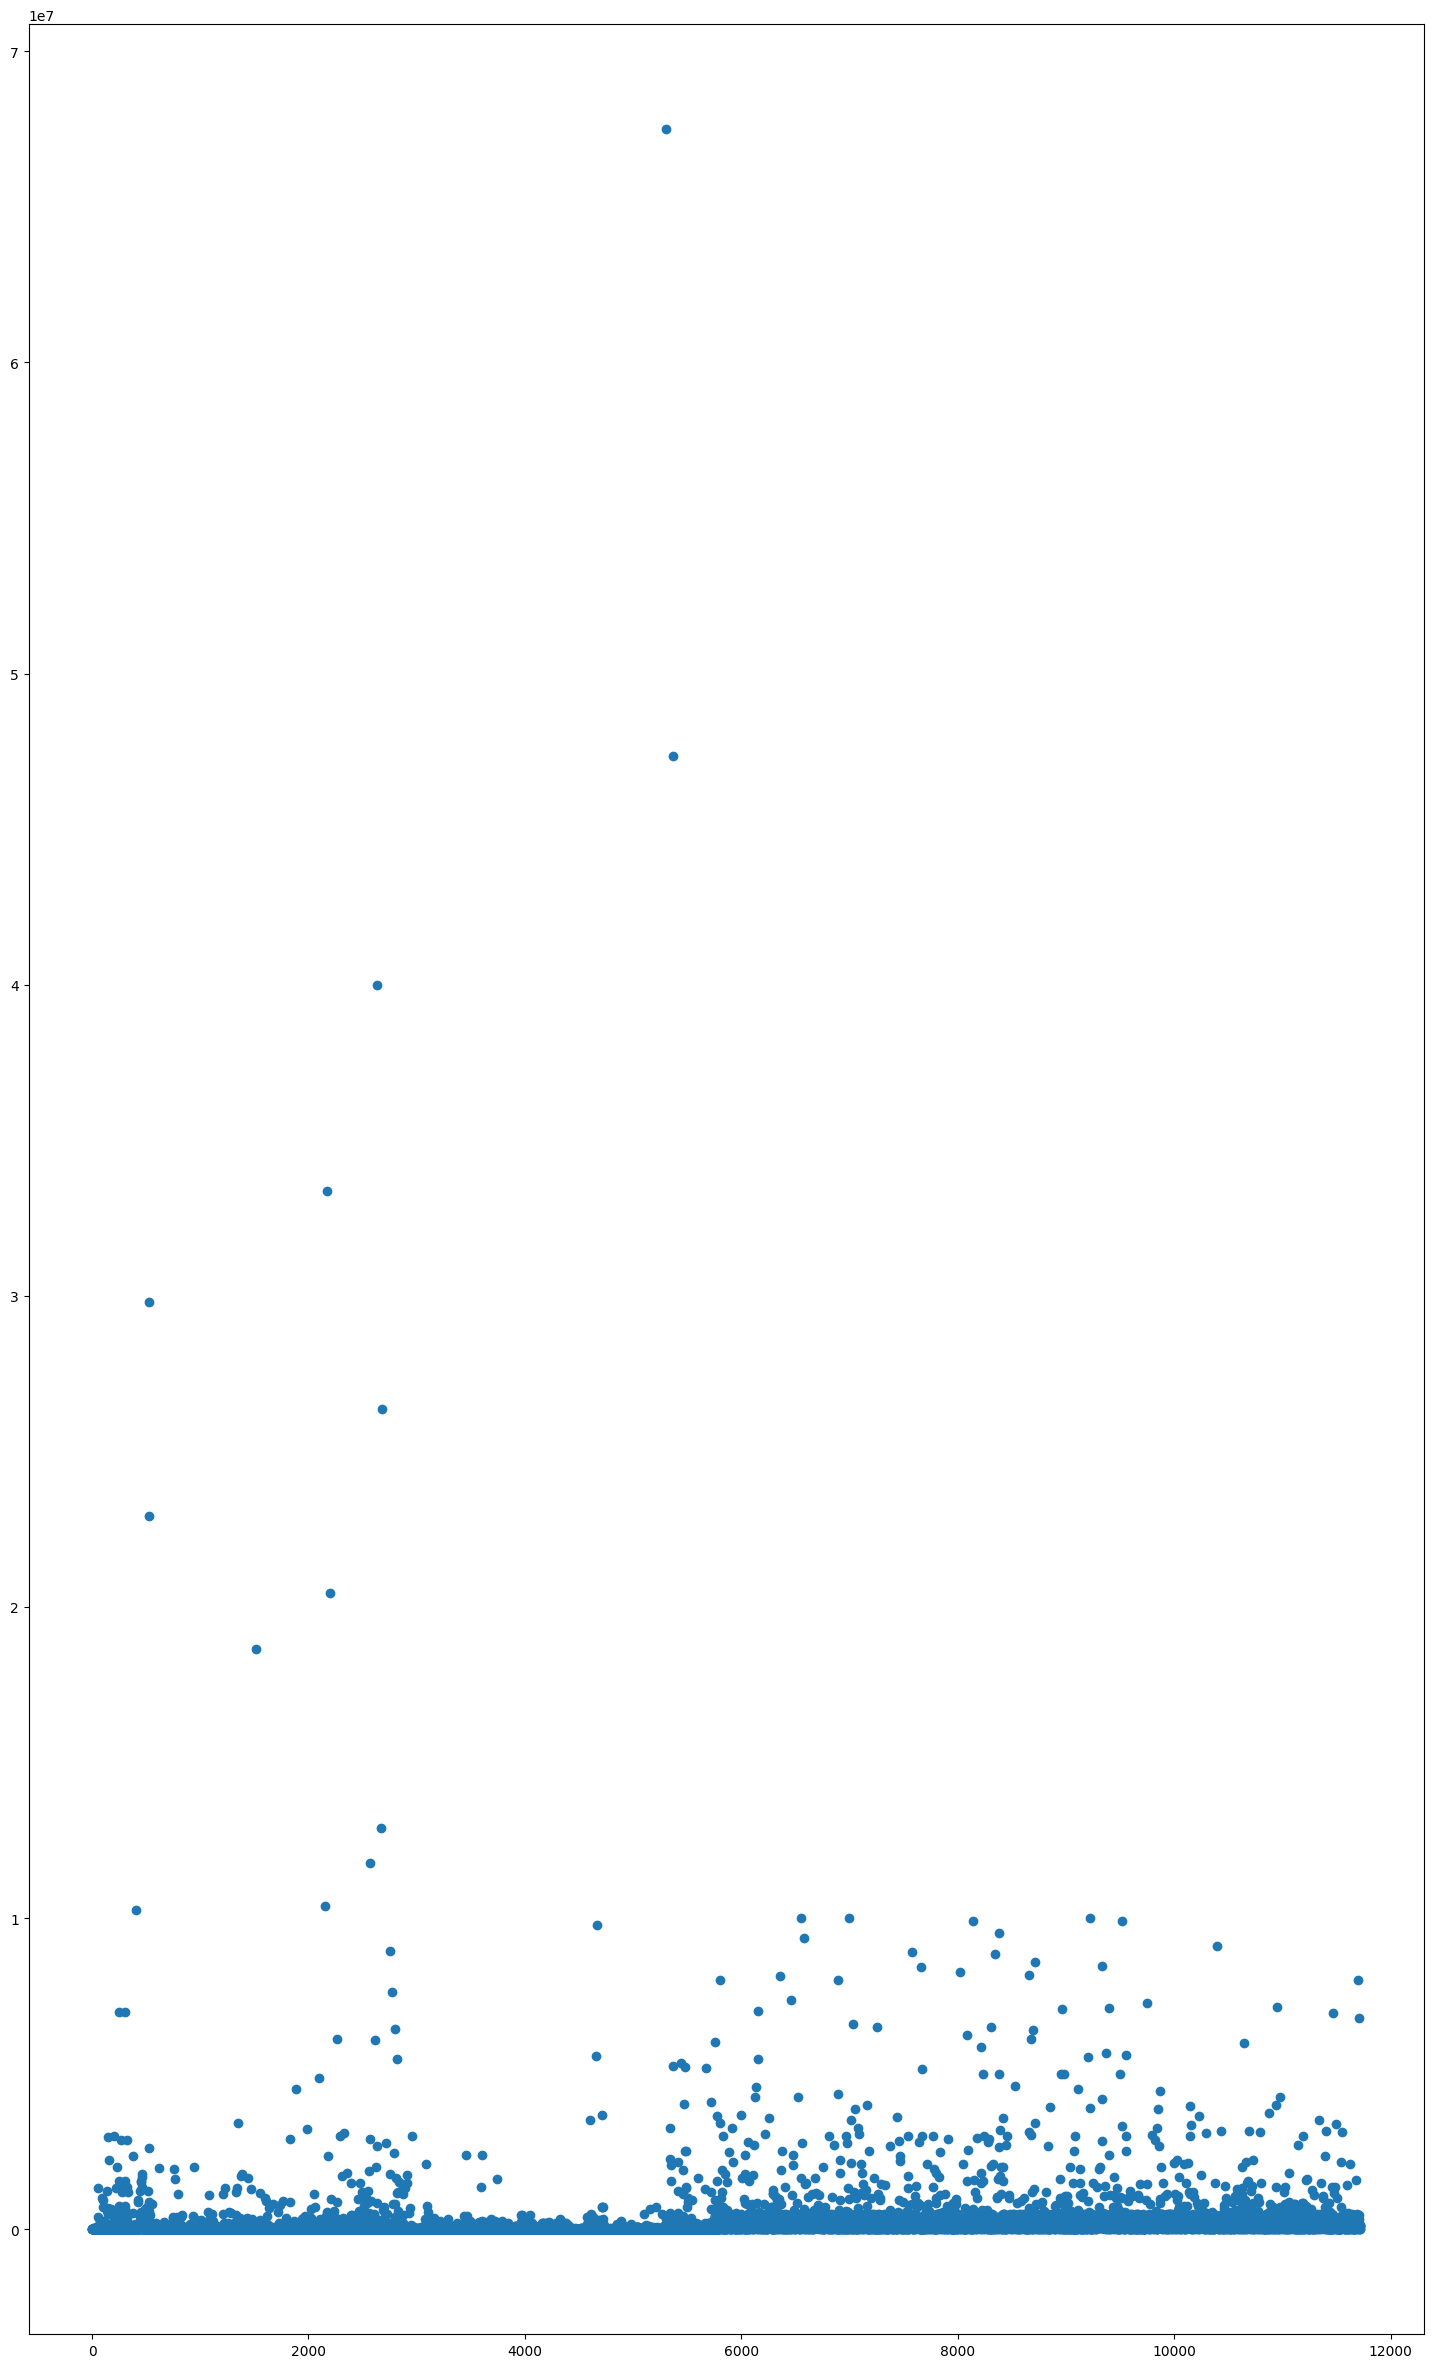

In [8]:
fig = plt.figure(figsize=(18, 30))
plt.scatter(np.arange(len(labels)),labels)
plt.show()

we have some large outliers numbers let's remove them

len of lower than 7_digits : 11703


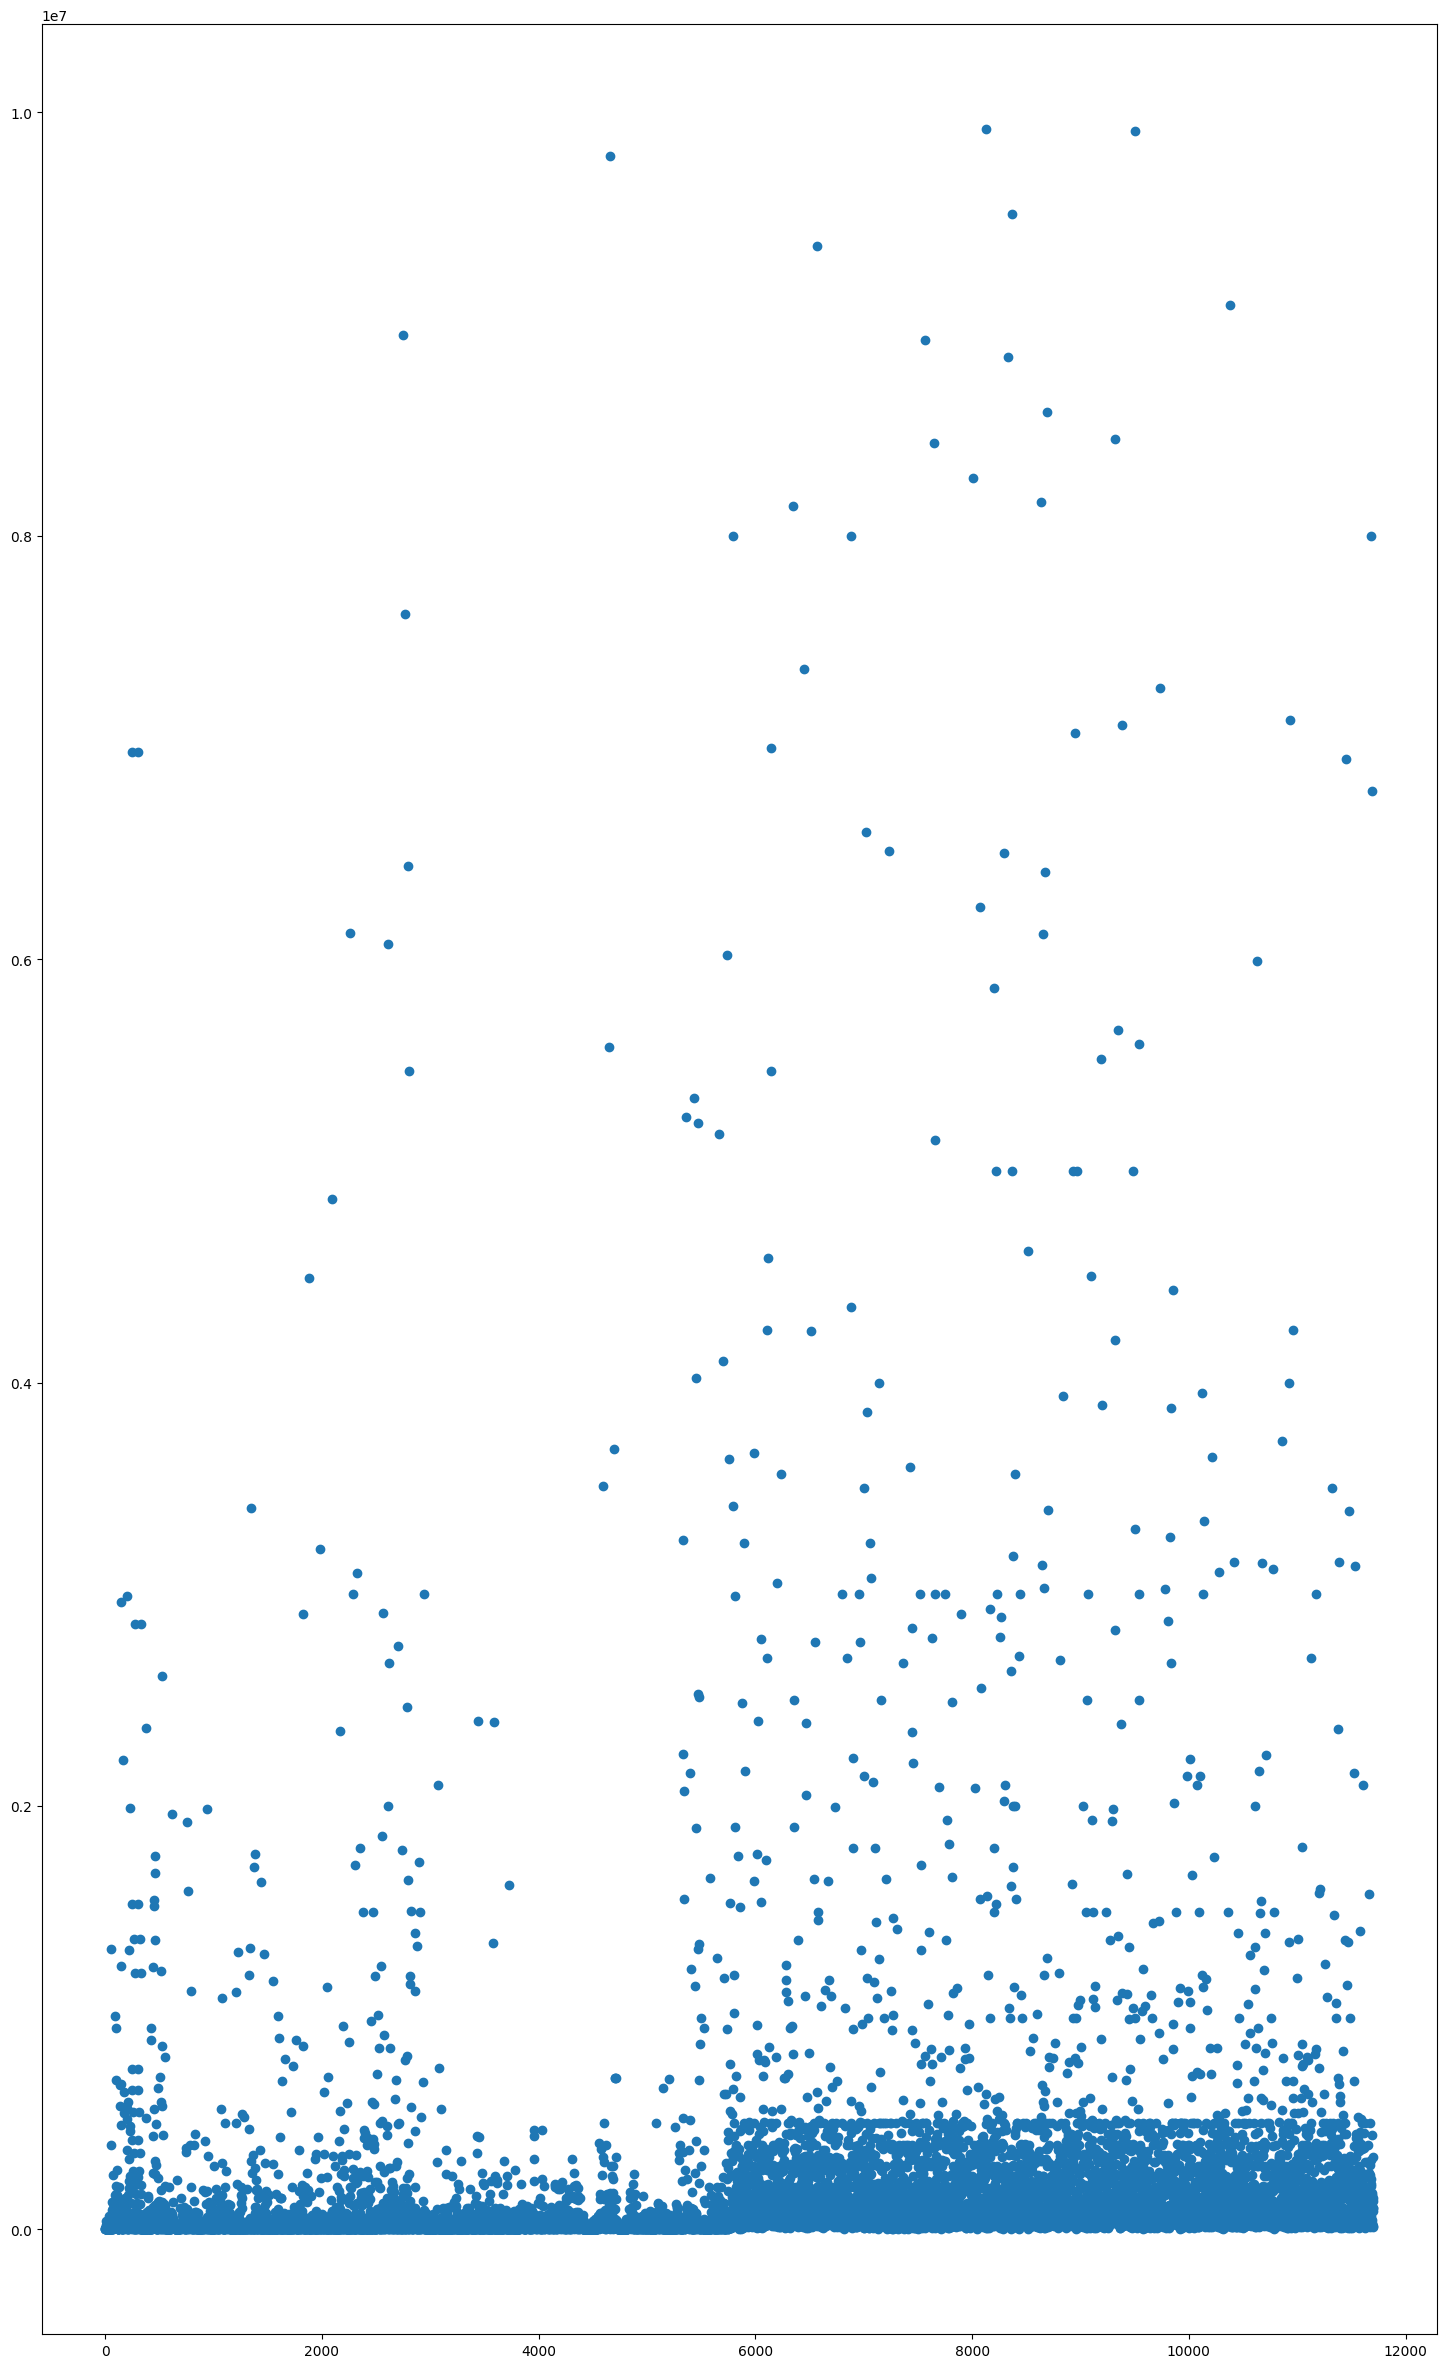

In [9]:
fig = plt.figure(figsize=(18, 30))
new_labels = [i for i in labels if i < 1e7]
plt.scatter(np.arange(len(new_labels)),new_labels)
print("len of lower than 7_digits :",len(new_labels))
plt.show()

len of 2_digits : 58


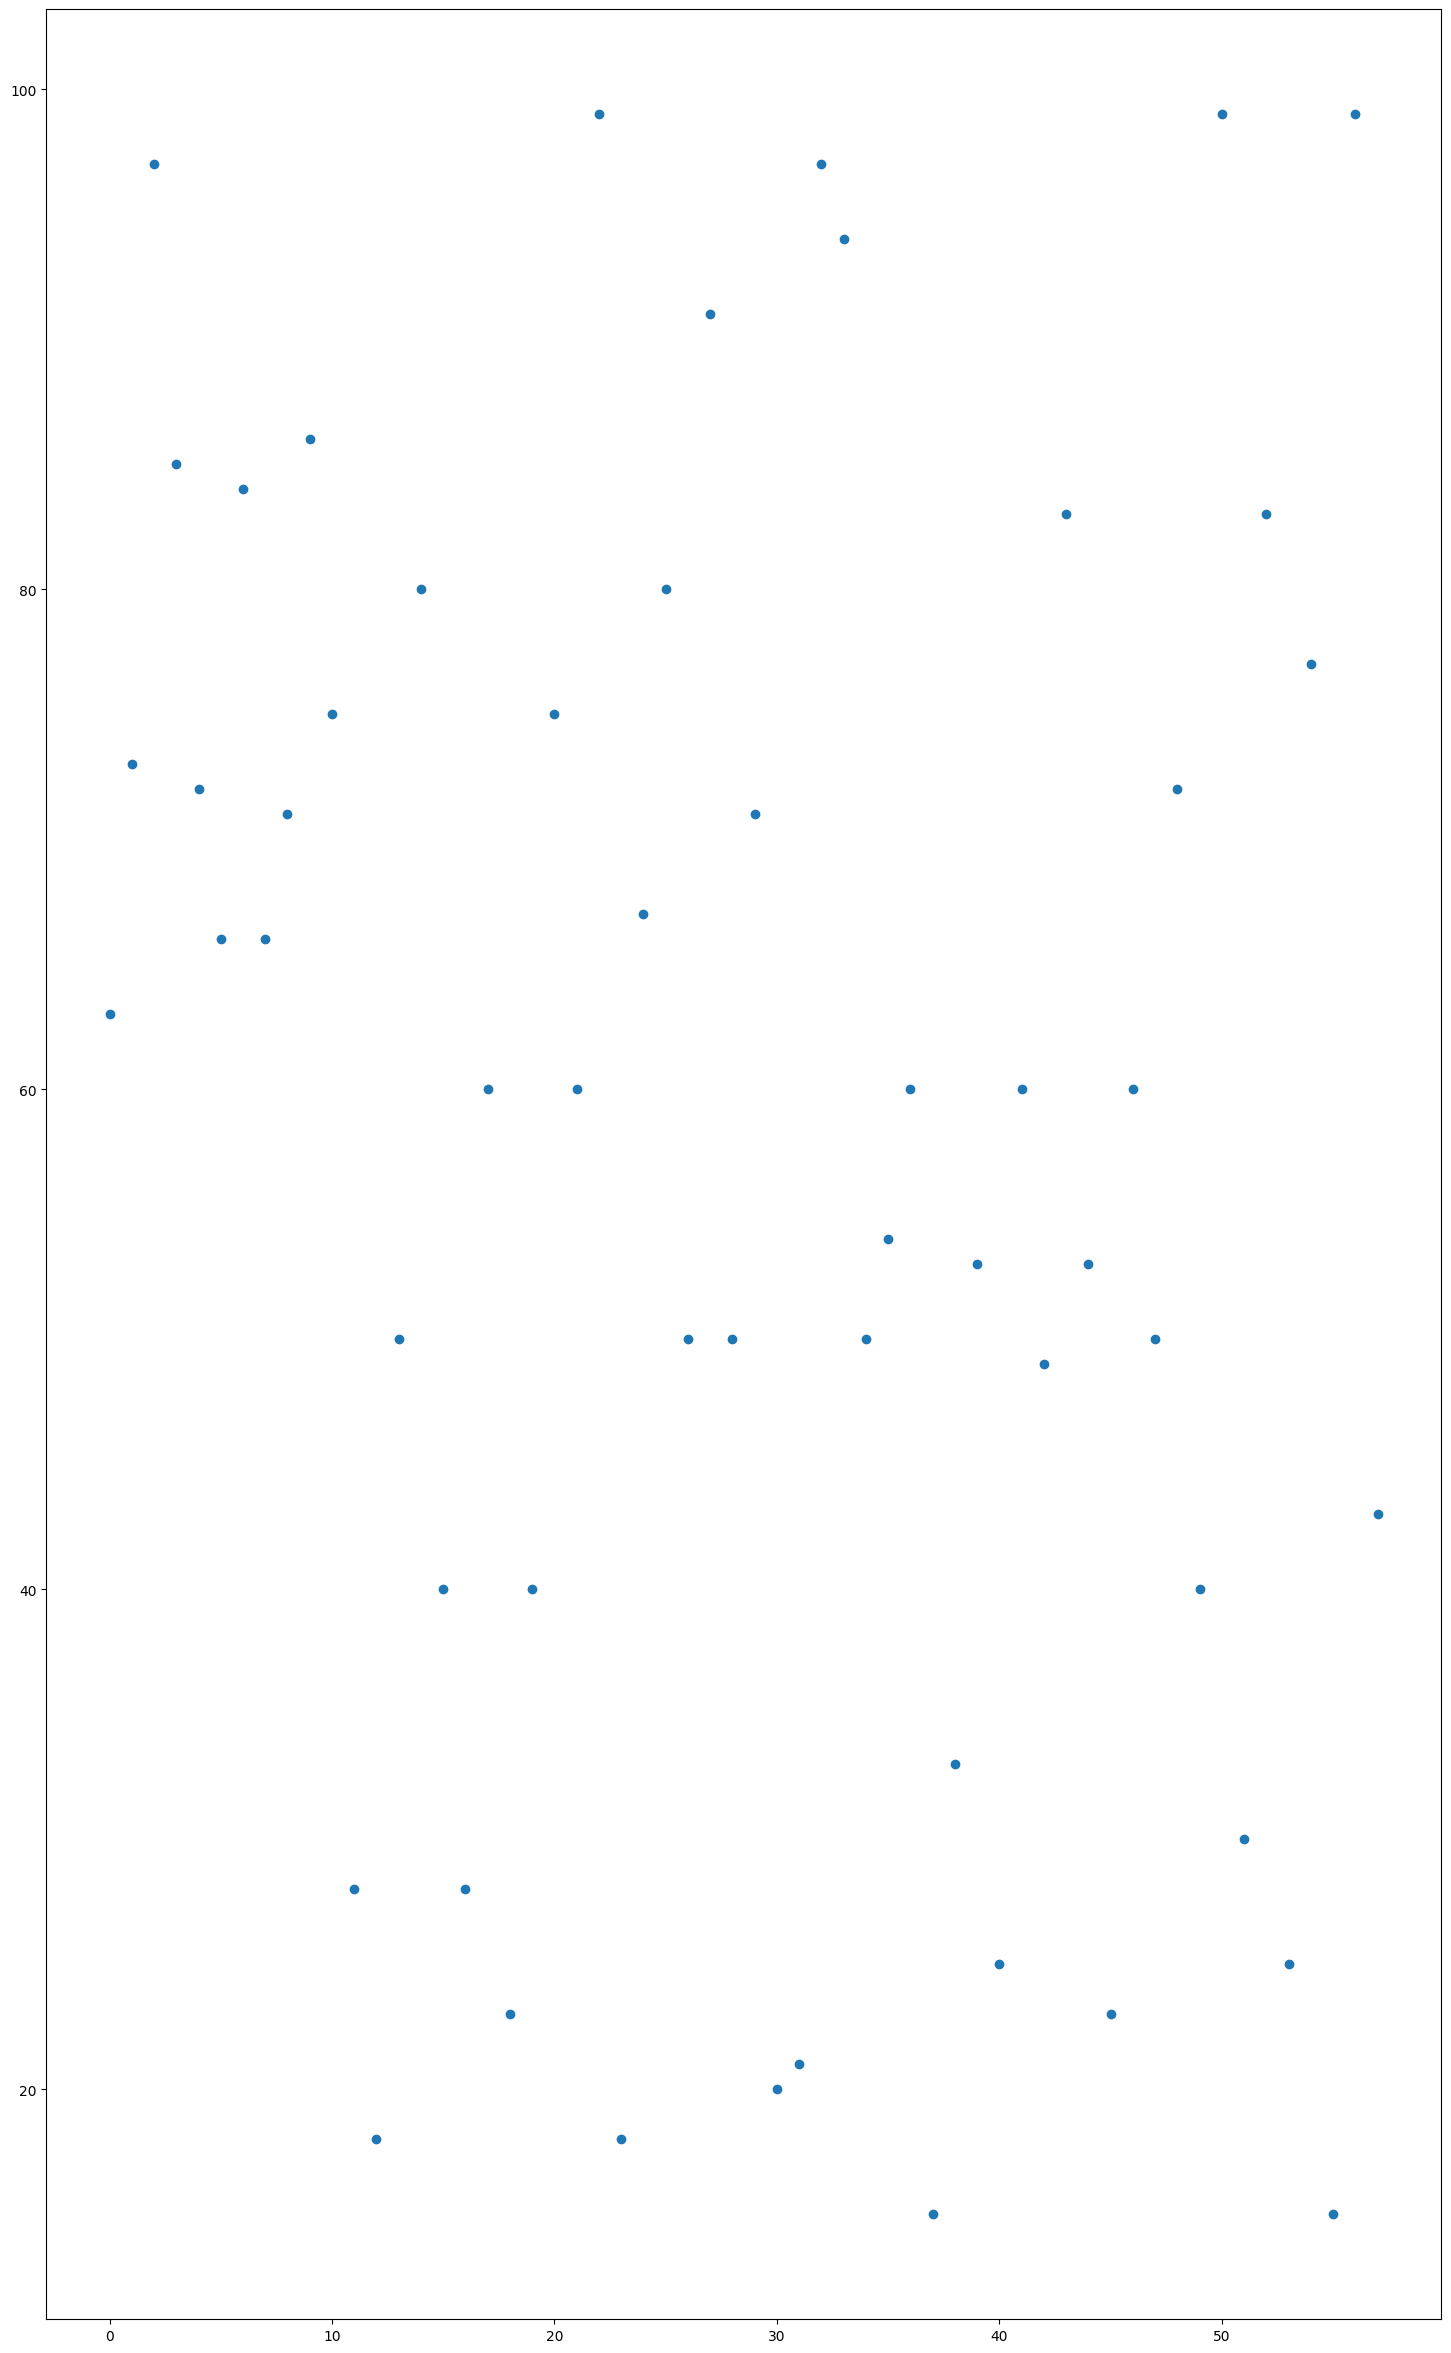

In [11]:
fig = plt.figure(figsize=(18, 30))
new_labels = [i for i in labels if i < 1e2]
plt.scatter(np.arange(len(new_labels)),new_labels)
print("len of 2_digits :",len(new_labels))
plt.show()

### because we want to resize images, it's better to remove 2_digit and more than 6_digit

len of 2_to_6digits : 11228
max 999005


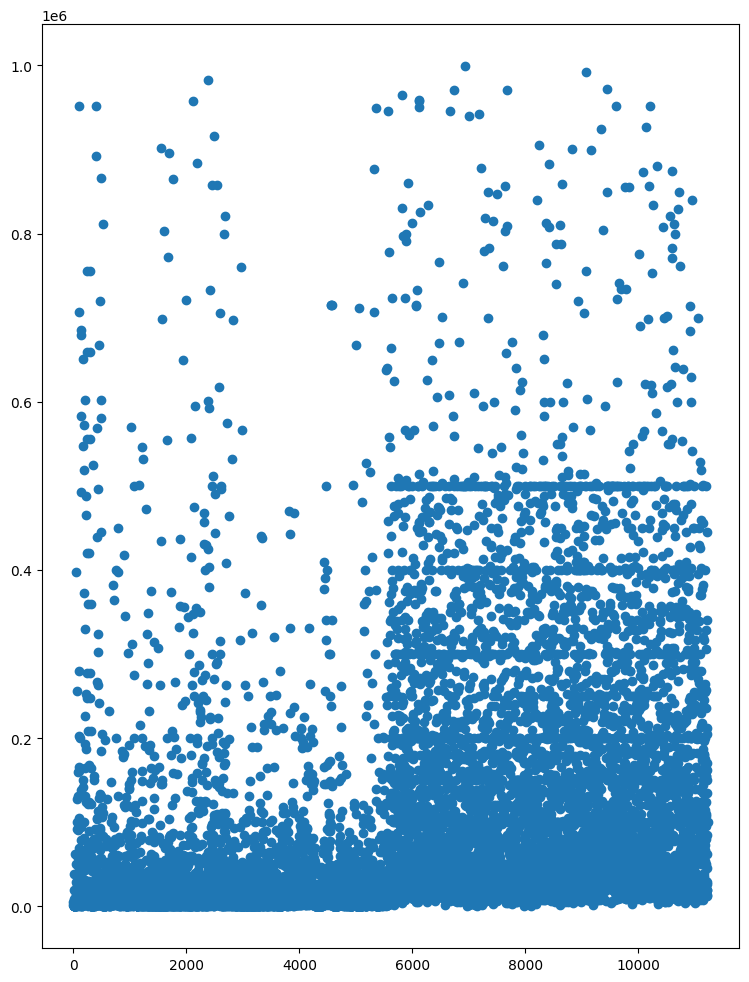

In [14]:
fig = plt.figure(figsize=(9, 12))
new_labels = [i for i in labels if 1e2 < i < 1e6]
plt.scatter(np.arange(len(new_labels)),new_labels)
print("len of 2_to_6digits :",len(new_labels))
print("max",np.max(new_labels))
plt.show()

ok i think that's good idea using these threshold

also we can see in plot that first 6000 data are distribute on lower values than next images

it's because CAR-A dataset comes from checks of Autruia country and CAR-B from urugue banks

so we need to shuffle data to get unbiased distribution 


In [13]:
#removing outliers
all_labels = all_labels[all_labels['label'] < 1e6][1e2 < all_labels['label']]

#shuffle dataframe
all_labels = all_labels.sample(frac=1).reset_index(drop=True)


C:\Users\rajab\AppData\Local\Temp\ipykernel_19268\217993480.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_labels = all_labels[all_labels['label'] < 1e6][1e2 < all_labels['label']]


I plot it again and it's very nice

## we will come here again Let's go for labeling
### I have two idea again :
- 1.Constant Size of Arrays
- 2.Variable Size of Arrays

In [14]:
# vocab = list("0123456789")

# all_labels['label'] = all_labels['label'].astype(str)
# label_seqs = []
# for label in all_labels['label']:
#     seq = np.zeros((len(label), 10))
#     for i, char in enumerate(label):
#         seq[i, vocab.index(char)] = 1
#     label_seqs.append(seq)

# all_labels['encoded_label'] = label_seqs

In [15]:
# vocab = list("0123456789")

# label_seqs = []
# for label in all_labels['label']:
#     seq = np.zeros((6, 10))
#     for i, char in enumerate(label[::-1]):
#         seq[5 - i, vocab.index(char)] = 1
#     label_seqs.append(seq)

# all_labels['encoded_label_2'] = label_seqs

In [16]:
# vocab = list("0123456789")


# label_seqs = []
# for label in all_labels['label']:
#     seq = np.zeros((6, 10))
#     for i, char in enumerate(label[::-1]):
#         seq[5 - i, vocab.index(char)] = 1
#     label_seqs.append(seq)

# all_labels['encoded_label_3'] = label_seqs
# all_labels['encoded_label_3'] = [i.reshape(-1) for i in all_labels['encoded_label_3']]
# all_labels['encoded_label_3'] = all_labels['encoded_label_3'].astype(list)

### let's use simple labeling 

In [18]:
for i,digit in enumerate(encoded_labels_4):
    all_labels['digit_%s'%i] = digit

In [19]:
all_labels.head()

,label,new_path,digit_0,digit_1,digit_2,digit_3,digit_4,digit_5,digit_6,digit_7,digit_8,digit_9
0,32732,./images/05650.png,0,0,1,1,0,0,0,1,0,0
1,5000,./images/02552.png,1,0,0,0,0,1,0,0,0,0
2,17690,./images/05144.png,1,1,0,0,0,0,1,1,0,1
3,7645,./images/03737.png,0,0,0,0,1,1,1,1,0,0
4,1248,./images/01226.png,0,1,1,0,1,0,0,0,1,0


## from here let's go step by step 
---------------------------------------------------------------------------------

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
import time

df = all_labels
image_paths = df['new_path']
labels = df[['digit_0', 'digit_1', 'digit_2', 'digit_3', 'digit_4', 'digit_5', 'digit_6', 'digit_7', 'digit_8', 'digit_9']].to_numpy()

images = []
for path in image_paths[:10000]:
    img = load_img(path, color_mode='grayscale', target_size=(256, 256))
    img_array = img_to_array(img) / 255.0
    img_vector = img_array.reshape(256*256)
    images.append(img_vector)

images = np.array(images)
print("images shape are :",images.shape)

# Reshape the image data into sequences of length 25
images = images.reshape(-1, 25, 1)

print("images shape are :",images.shape)

labels = labels[:10000]
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


model = Sequential()
model.add(tf.keras.layers.SimpleRNN(200, input_shape=(25,1)))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

loss, accuracy = model.evaluate(x_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

#y_pred = model.predict(x_test[:32])


images shape are : (10000, 65536)
images shape are : (26214400, 25, 1)


ValueError: Found input variables with inconsistent numbers of samples: [26214400, 10000]

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
import time
df = all_labels
image_paths = df['new_path']
labels = df[['digit_0', 'digit_1', 'digit_2', 'digit_3', 'digit_4', 'digit_5', 'digit_6', 'digit_7', 'digit_8', 'digit_9']].to_numpy()

images = []
for path in image_paths[:10000]:
    img = load_img(path, color_mode='grayscale', target_size=(256, 256))
    img_array = img_to_array(img) / 255.0
    img_vector = img_array.reshape(256*256)
    images.append(img_vector)

images = np.array(images)
print("images shape are :",images.shape)
# Reshape the image data into sequences of length 25
# images = images.reshape(-1, 25, 256*256)

labels = labels[:10000]


images shape are : (10000, 65536)


In [24]:
images.shape , labels.shape

((10000, 65536), (10000, 10))

In [48]:
labels[1]

array([[0, 1, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 1]], dtype=int64)

In [21]:
import numpy as np

# Assume that y has shape (10000, 10)
y_reshaped = images.reshape((-1, 1, 256*256))  # Reshape y to (10000, 1, 10)
y_repeated = np.repeat(y_reshaped, 10, axis=1)  # Repeat each label sequence 25 times
images = y_repeated.reshape((-1, 10, 256*256))  # Reshape y to (400, 25, 10)

In [25]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


In [39]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8000, 32, 2048), (2000, 32, 2048), (8000, 10), (2000, 10))

In [43]:
x_train =x_train.reshape(-1, 32, 256*256//32)
x_test = x_test.reshape(-1, 32, 256*256//32)
y_train = y_train.reshape(-1,10)
y_test = y_test.reshape(-1, 10)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8000, 32, 2048), (2000, 32, 2048), (8000, 10), (2000, 10))

In [35]:
x_train =x_train.reshape(-1, 32, 256*256//32)
x_test = x_test.reshape(-1, 32, 256*256//32)

In [44]:

model = Sequential()
model.add(tf.keras.layers.SimpleRNN(200, input_shape=(32,256*256//32)))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

loss, accuracy = model.evaluate(x_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

#y_pred = model.predict(x_test[:32])

Epoch 1/10
250/250 [==============================] - 17s 60ms/step - loss: 8.4541 - accuracy: 0.6553 - val_loss: 8.1116 - val_accuracy: 0.6690
Epoch 2/10
250/250 [==============================] - 14s 55ms/step - loss: 8.2130 - accuracy: 0.6637 - val_loss: 8.1460 - val_accuracy: 0.6690
Epoch 3/10
250/250 [==============================] - 14s 54ms/step - loss: 8.1800 - accuracy: 0.6637 - val_loss: 8.1511 - val_accuracy: 0.6690
Epoch 4/10
250/250 [==============================] - 14s 55ms/step - loss: 8.1691 - accuracy: 0.6637 - val_loss: 7.9482 - val_accuracy: 0.6690
Epoch 5/10
250/250 [==============================] - 14s 54ms/step - loss: 8.1665 - accuracy: 0.6637 - val_loss: 8.1467 - val_accuracy: 0.6690
Epoch 6/10
250/250 [==============================] - 14s 55ms/step - loss: 8.1489 - accuracy: 0.6637 - val_loss: 8.1963 - val_accuracy: 0.6690
Epoch 7/10
250/250 [==============================] - 14s 55ms/step - loss: 8.1610 - accuracy: 0.6637 - val_loss: 8.0845 - val_accuracy:

In [42]:
x_test[0].shape

(32, 2048)

In [45]:
y_pred = model.predict(x_test[:32])
y_pred

1/1 [==============================] - 0s 136ms/step


array([[0.38984352, 0.12213554, 0.07130628, 0.0964463 , 0.10436291,
        0.05908613, 0.03425283, 0.05401568, 0.03065722, 0.0378936 ],
       [0.38984352, 0.12213554, 0.07130628, 0.0964463 , 0.10436291,
        0.05908613, 0.03425283, 0.05401568, 0.03065722, 0.0378936 ],
       [0.38984352, 0.12213554, 0.07130628, 0.0964463 , 0.10436291,
        0.05908613, 0.03425283, 0.05401568, 0.03065722, 0.0378936 ],
       [0.38984352, 0.12213554, 0.07130628, 0.0964463 , 0.10436291,
        0.05908613, 0.03425283, 0.05401568, 0.03065722, 0.0378936 ],
       [0.38984352, 0.12213554, 0.07130628, 0.0964463 , 0.10436291,
        0.05908613, 0.03425283, 0.05401568, 0.03065722, 0.0378936 ],
       [0.38984352, 0.12213554, 0.07130628, 0.0964463 , 0.10436291,
        0.05908613, 0.03425283, 0.05401568, 0.03065722, 0.0378936 ],
       [0.38984352, 0.12213554, 0.07130628, 0.0964463 , 0.10436291,
        0.05908613, 0.03425283, 0.05401568, 0.03065722, 0.0378936 ],
       [0.38984352, 0.12213554, 0.0713062

In [52]:
np.round(y_pred)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 

In [37]:
images_copy = images
images_copy = images_copy.reshape(-1, 25, 256*256)
images_copy.shape

(400, 25, 65536)

In [33]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

model = Sequential()
model.add(SimpleRNN(20, input_shape=(25, 256*256)))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

loss, accuracy = model.evaluate(x_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

y_pred = model.predict(x_test[:32])

ValueError: Found input variables with inconsistent numbers of samples: [440, 11000]

In [27]:
images.shape

(11228, 65536)

In [86]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
images =[]
for path in all_labels['new_path']:
    # Load the image as a PIL Image object
    img = load_img(path, color_mode='grayscale', target_size=(256, 256))
    # Convert the image to a NumPy array and scale the pixel values to the [0, 1] range
    img_array = img_to_array(img) / 255.0
    # Append the image array to the list of images
    images.append(img_array)

images[0]

array([[[0.78431374],
        [0.78039217],
        [0.7764706 ],
        ...,
        [0.77254903],
        [0.7647059 ],
        [0.7607843 ]],

       [[0.78431374],
        [0.78039217],
        [0.7764706 ],
        ...,
        [0.77254903],
        [0.7647059 ],
        [0.7607843 ]],

       [[0.7764706 ],
        [0.77254903],
        [0.76862746],
        ...,
        [0.7607843 ],
        [0.7529412 ],
        [0.7490196 ]],

       ...,

       [[0.6784314 ],
        [0.67058825],
        [0.6509804 ],
        ...,
        [0.6745098 ],
        [0.67058825],
        [0.6745098 ]],

       [[0.6745098 ],
        [0.6666667 ],
        [0.6431373 ],
        ...,
        [0.6745098 ],
        [0.67058825],
        [0.6745098 ]],

       [[0.6745098 ],
        [0.6666667 ],
        [0.6431373 ],
        ...,
        [0.6745098 ],
        [0.67058825],
        [0.6745098 ]]], dtype=float32)

In [87]:
images = np.array(images)
images[0]

array([[[0.78431374],
        [0.78039217],
        [0.7764706 ],
        ...,
        [0.77254903],
        [0.7647059 ],
        [0.7607843 ]],

       [[0.78431374],
        [0.78039217],
        [0.7764706 ],
        ...,
        [0.77254903],
        [0.7647059 ],
        [0.7607843 ]],

       [[0.7764706 ],
        [0.77254903],
        [0.76862746],
        ...,
        [0.7607843 ],
        [0.7529412 ],
        [0.7490196 ]],

       ...,

       [[0.6784314 ],
        [0.67058825],
        [0.6509804 ],
        ...,
        [0.6745098 ],
        [0.67058825],
        [0.6745098 ]],

       [[0.6745098 ],
        [0.6666667 ],
        [0.6431373 ],
        ...,
        [0.6745098 ],
        [0.67058825],
        [0.6745098 ]],

       [[0.6745098 ],
        [0.6666667 ],
        [0.6431373 ],
        ...,
        [0.6745098 ],
        [0.67058825],
        [0.6745098 ]]], dtype=float32)

In [91]:
labels = all_labels[['digit_0', 'digit_1', 'digit_2', 'digit_3', 'digit_4', 'digit_5', 'digit_6', 'digit_7', 'digit_8', 'digit_9']].to_numpy()
labels[0]

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [93]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

labels = to_categorical(labels)

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


In [94]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

# Define the model architecture
model = Sequential()
model.add(SimpleRNN(20, input_shape=(25, 256*256)))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [95]:
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model using the test data
loss, accuracy = model.evaluate(x_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


Epoch 1/10


ValueError: in user code:

    File "C:\Users\rajab\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\rajab\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\rajab\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\rajab\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py", line 1080, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\rajab\AppData\Roaming\Python\Python310\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\rajab\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_7" is incompatible with the layer: expected shape=(None, 25, 65536), found shape=(None, 256, 256, 1)


In [75]:

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split= 0.2
)

train_generator = datagen.flow_from_dataframe(
    dataframe=all_labels,
    directory='',
    x_col='new_path',
    y_col=['digit_0', 'digit_1', 'digit_2', 'digit_3', 'digit_4', 'digit_5', 'digit_6', 'digit_7', 'digit_8', 'digit_9'],
    subset='training',
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode='raw', # Set class_mode to 'raw' for multi-label classification
    color_mode='grayscale'
)

test_generator = datagen.flow_from_dataframe(
    dataframe=all_labels,
    directory='',
    x_col='new_path',
    y_col=['digit_0', 'digit_1', 'digit_2', 'digit_3', 'digit_4', 'digit_5', 'digit_6', 'digit_7', 'digit_8', 'digit_9'],
    subset='validation',
    batch_size=32,
    seed=42,
    shuffle=False, # Set shuffle to False for test data
    class_mode='raw', # Set class_mode to 'raw' for multi-label classification
    color_mode='grayscale'
)

#you should consider that 
# test_generator.image_shape => (256, 256, 1)

Found 8983 validated image filenames.
Found 2245 validated image filenames.


In [73]:
f = test_generator.image_shape
f

(256, 256, 1)

In [84]:
import tensorflow as tf

# Create the RNN layer
rnn_layer = tf.keras.layers.GRU(units=128, activation='tanh')

# Input sequence
x = tf.keras.layers.Input(shape=(256*256, 1))

# Pass the input sequence through the RNN layer
output = rnn_layer(x)

# Create the output layer
output_layer = tf.keras.layers.Dense(units=10, activation='softmax')

# Pass the output of the RNN layer through the output layer
y_pred = output_layer(output)

# Define the loss function
#loss = tf.keras.losses.categorical_crossentropy(y_true, y_pred)

# Define the optimizer
optimizer = tf.keras.optimizers.Adam()

# Define the metrics
metrics = ['accuracy']

# Compile the model
model = tf.keras.models.Model(inputs=x, outputs=y_pred)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=metrics)

# Train the model
model.fit(train_generator, epochs=10)

# Evaluate the model
model.evaluate(test_generator)


Epoch 1/10


ValueError: in user code:

    File "C:\Users\rajab\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\rajab\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\rajab\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\rajab\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py", line 1080, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\rajab\AppData\Roaming\Python\Python310\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\rajab\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\input_spec.py", line 235, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'model_1' (type Functional).
    
    Input 0 of layer "gru_10" is incompatible with the layer: expected ndim=3, found ndim=4. Full shape received: (None, None, None, None)
    
    Call arguments received by layer 'model_1' (type Functional):
      • inputs=tf.Tensor(shape=(None, None, None, None), dtype=float32)
      • training=True
      • mask=None


In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
model = Sequential()
model.add(tf.keras.layers.SimpleRNN(units=20, input_shape=(25, 256*256)))
model.add(Dense(10, activation='sigmoid'))
# Define the model architecture

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam')


# Train the model using the training data generator
model.fit(train_generator, epochs=10)



Epoch 1/10


ValueError: in user code:

    File "C:\Users\rajab\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\rajab\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\rajab\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\rajab\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py", line 1080, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\rajab\AppData\Roaming\Python\Python310\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\rajab\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\input_spec.py", line 235, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_6' (type Sequential).
    
    Input 0 of layer "simple_rnn_3" is incompatible with the layer: expected ndim=3, found ndim=4. Full shape received: (None, None, None, None)
    
    Call arguments received by layer 'sequential_6' (type Sequential):
      • inputs=tf.Tensor(shape=(None, None, None, None), dtype=float32)
      • training=True
      • mask=None


In [79]:


# Evaluate the model using the test data generator
model.evaluate(test_generator)

# Make predictions on a new batch of test data
x_test, y_test = next(test_generator)
x_test = x_test.reshape((x_test.shape[0], 25, -1))
y_pred = model.predict(x_test)

Epoch 1/10


ValueError: in user code:

    File "C:\Users\rajab\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\rajab\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\rajab\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\rajab\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py", line 1080, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\rajab\AppData\Roaming\Python\Python310\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\rajab\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\input_spec.py", line 235, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_3' (type Sequential).
    
    Input 0 of layer "simple_rnn" is incompatible with the layer: expected ndim=3, found ndim=4. Full shape received: (None, None, None, None)
    
    Call arguments received by layer 'sequential_3' (type Sequential):
      • inputs=tf.Tensor(shape=(None, None, None, None), dtype=float32)
      • training=True
      • mask=None


In [78]:
import numpy as np
import tensorflow as tf

# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.GRU(256, input_shape=(None, 256*256)),
    tf.keras.layers.Dense(10, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam')

# Reshape the input data to have shape (time_steps, batch_size, 256, 256, 1)
train_data = np.reshape(train_generator[0][0], (train_generator[0][0].shape[1], train_generator[0][0].shape[0],) + train_generator[0][0].shape[2:])
test_data = np.reshape(test_generator[0][0], (test_generator[0][0].shape[1], test_generator[0][0].shape[0],) + test_generator[0][0].shape[2:])

# Train the model using the training data generator
model.fit(train_data, train_generator[0][1], epochs=10)

# Evaluate the model using the test data generator
model.evaluate(test_data, test_generator[0][1])

# Make predictions on a new batch of test data
x_test, y_test = next(test_generator)
x_test = np.reshape(x_test, (x_test.shape[1], x_test.shape[0],) + x_test.shape[2:])
y_pred = model.predict(x_test)

ValueError: Data cardinality is ambiguous:
  x sizes: 256
  y sizes: 32
Make sure all arrays contain the same number of samples.

In [45]:
def get_y_true(df):
  return df[['digit_0', 'digit_1', 'digit_2', 'digit_3', 'digit_4', 'digit_5', 'digit_6', 'digit_7', 'digit_8', 'digit_9']].values
y_true = get_y_true(all_labels)

In [72]:
import tensorflow as tf

# Create the RNN layer
rnn_layer = tf.keras.layers.GRU(units=128, activation='tanh')

# Input sequence
x = tf.keras.layers.Input(shape=((32, 256, 256, 1)))

# Pass the input sequence through the RNN layer
output = rnn_layer(x)

# Create the output layer
output_layer = tf.keras.layers.Dense(units=10, activation='softmax')

# Pass the output of the RNN layer through the output layer
y_pred = output_layer(output)

# Define the loss function
loss = tf.keras.losses.categorical_crossentropy(y_true, y_pred)

# Define the optimizer
optimizer = tf.keras.optimizers.Adam()

# Define the metrics
metrics = ['accuracy']

# Compile the model
model = tf.keras.models.Model(inputs=x, outputs=y_pred)
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Train the model
model.fit(train_generator, epochs=10)

# Evaluate the model

model.evaluate(test_generator)


ValueError: Input 0 of layer "gru_5" is incompatible with the layer: expected ndim=3, found ndim=5. Full shape received: (None, 32, 256, 256, 1)

In [28]:
import tensorflow as tf
from tensorflow.keras import layers

# Define the input shape
input_shape = (max_width, max_width, 3)

# Define the RNN model
model = tf.keras.Sequential([
    layers.Input(shape=input_shape),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Reshape((max_height*(max_width//4)*64,)),
    layers.LSTM(64),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

# Compile the model with binary_crossentropy loss
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.n // test_generator.batch_size,
    epochs=10
)


ValueError: Exception encountered when calling layer "reshape_1" (type Reshape).

total size of new array must be unchanged, input_shape = [89, 89, 64], output_shape = [622080]

Call arguments received by layer "reshape_1" (type Reshape):
  • inputs=tf.Tensor(shape=(None, 89, 89, 64), dtype=float32)

In [104]:
keras.backend.clear_session()

In [ ]:
model.fit(train_generator, epochs=10, validation_data=test_generator)